In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv("Complete_Data_TripAdvisor.csv",encoding = 'unicode_escape')

In [8]:
data.head()

,Hotel,reviewer_name,country,clean countries,rating,date_of_stay,date_review_written,clean_reviews,clean_reviews Positive Sentiment Score,clean_reviews Negative Sentiment Score,clean_reviews Neutral Sentiment Score,clean_reviews Compound Sentiment Score,sentiment,word_count,word_count_scaled,preprocessed_reviews,topic_label
0,1,ChristelleNg,Singapore,Singapore,4,22-Dec,23-Jan,Love the look Location not too bad. Near the H...,0.184,0.092,0.724,0.654,Positive,48.0,-0.659063128,love look location bad station comfortable bed...,5
1,9Brick_Hotel,Molly123,NaN,NaN,1,22-Dec,22-Dec,Very bad experience I asked the hotel to provi...,0.154,0.156,0.690,-0.275,Neutral,51.0,-0.634014814,bad experience ask provide set comfort refuse ...,2
2,9Brick_Hotel,wamysdottir,Denmark,Denmark,4,19-Oct,20-Apr,Chic design A clean boutique hotel convenientl...,0.157,0.000,0.843,0.9,Positive,81.0,-0.38353167,chic design clean boutique conveniently locate...,5
3,9Brick_Hotel,worldtraveller,NaN,NaN,3,19-Dec,19-Dec,Great location but weak service standards Let ...,0.140,0.087,0.774,0.945,Positive,240.0,0.944028994,location weak service standard let start like ...,2
4,9Brick_Hotel,Hui Yingg,Australia,Australia,4,19-Nov,19-Nov,Never better This hotel exceeded my expectatio...,0.156,0.020,0.823,0.978,Positive,170.0,0.359568324,never well exceed expectation term efficient s...,2


In [13]:
import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        pass 

In [14]:
data["continent"] = data["clean countries"].apply(country_to_continent)

In [15]:
data.head()

,Hotel,reviewer_name,country,clean countries,rating,date_of_stay,date_review_written,clean_reviews,clean_reviews Positive Sentiment Score,clean_reviews Negative Sentiment Score,clean_reviews Neutral Sentiment Score,clean_reviews Compound Sentiment Score,sentiment,word_count,word_count_scaled,preprocessed_reviews,topic_label,continent
0,1,ChristelleNg,Singapore,Singapore,4,22-Dec,23-Jan,Love the look Location not too bad. Near the H...,0.184,0.092,0.724,0.654,Positive,48.0,-0.659063128,love look location bad station comfortable bed...,5,Asia
1,9Brick_Hotel,Molly123,NaN,NaN,1,22-Dec,22-Dec,Very bad experience I asked the hotel to provi...,0.154,0.156,0.690,-0.275,Neutral,51.0,-0.634014814,bad experience ask provide set comfort refuse ...,2,None
2,9Brick_Hotel,wamysdottir,Denmark,Denmark,4,19-Oct,20-Apr,Chic design A clean boutique hotel convenientl...,0.157,0.000,0.843,0.9,Positive,81.0,-0.38353167,chic design clean boutique conveniently locate...,5,Europe
3,9Brick_Hotel,worldtraveller,NaN,NaN,3,19-Dec,19-Dec,Great location but weak service standards Let ...,0.140,0.087,0.774,0.945,Positive,240.0,0.944028994,location weak service standard let start like ...,2,None
4,9Brick_Hotel,Hui Yingg,Australia,Australia,4,19-Nov,19-Nov,Never better This hotel exceeded my expectatio...,0.156,0.020,0.823,0.978,Positive,170.0,0.359568324,never well exceed expectation term efficient s...,2,Oceania


In [16]:
# saving the sentiment_scores for future use
data.to_csv("New_Complete_Data_TripAdvisor.csv")

# Grouping the Topic Frequency by Continent

In [19]:
# Group the data by continent and topic
grouped_data = data.groupby(['continent', 'topic_label']).size().reset_index(name='count')

# Reshape the data using pivot
pivot_data = grouped_data.pivot(index='continent', columns='topic_label', values='count').fillna(0)

In [18]:
pivot_data.to_excel("ContAnalysis.xlsx",sheet_name='Topic by Continent') 

# % of reviews by Topic Label by Hotel

In [6]:
data = pd.read_csv("New_Complete_Data_TripAdvisor.csv",encoding = 'unicode_escape')

In [7]:
data.head(3)

,Unnamed: 0,Hotel,reviewer_name,country,clean countries,rating,date_of_stay,date_review_written,clean_reviews,clean_reviews Positive Sentiment Score,clean_reviews Negative Sentiment Score,clean_reviews Neutral Sentiment Score,clean_reviews Compound Sentiment Score,sentiment,word_count,word_count_scaled,preprocessed_reviews,topic_label,continent
0,0,9Brick_Hotel,ChristelleNg,Singapore,Singapore,4,22-Dec,23-Jan,Love the look Location not too bad. Near the H...,0.184,0.092,0.724,0.654,Positive,48.0,-0.659063128,love look location bad station comfortable bed...,5,Asia
1,1,9Brick_Hotel,Molly123,NaN,NaN,1,22-Dec,22-Dec,Very bad experience I asked the hotel to provi...,0.154,0.156,0.690,-0.275,Neutral,51.0,-0.634014814,bad experience ask provide set comfort refuse ...,2,NaN
2,2,9Brick_Hotel,wamysdottir,Denmark,Denmark,4,19-Oct,20-Apr,Chic design A clean boutique hotel convenientl...,0.157,0.000,0.843,0.9,Positive,81.0,-0.38353167,chic design clean boutique conveniently locate...,5,Europe


In [8]:
# Group the data by hotel and topic label and calculate the count of reviews
grouped_df = data.groupby(['Hotel', 'topic_label'])['clean_reviews'].count().reset_index()

# Calculate the total number of reviews for each hotel
hotel_totals = grouped_df.groupby('Hotel')['clean_reviews'].sum()

# Calculate the percentage of reviews mentioning each topic label for each hotel
grouped_df['percentage'] = round(grouped_df['clean_reviews'] / grouped_df['Hotel'].map(hotel_totals) * 100,2)

In [9]:
grouped_df.head(20)

,Hotel,topic_label,clean_reviews,percentage
0,9Brick_Hotel,0,1,5.00
1,9Brick_Hotel,1,1,5.00
2,9Brick_Hotel,2,4,20.00
3,9Brick_Hotel,4,1,5.00
4,9Brick_Hotel,5,9,45.00
5,9Brick_Hotel,6,3,15.00
6,9Brick_Hotel,7,1,5.00
7,Acube_Hotel,0,12,17.39
8,Acube_Hotel,2,5,7.25
9,Acube_Hotel,4,5,7.25


In [10]:
grouped_df.to_excel("TripAdvisor5555.xlsx",sheet_name='%of reviews by topic by hotel')  

# % of reviews by Topic Label by Country

In [11]:
# Group the data by country and topic label and calculate the count of reviews
grouped_df_country = data.groupby(['clean countries', 'topic_label'])['clean_reviews'].count().reset_index()

# Calculate the total number of reviews for each country
country_totals = grouped_df_country.groupby('clean countries')['clean_reviews'].sum()

# Calculate the percentage of reviews mentioning each topic label for each hotel
grouped_df_country['percentage'] = round(grouped_df_country['clean_reviews'] / grouped_df_country['clean countries'].map(country_totals) * 100,2)

In [12]:
grouped_df_country.head(20)

,clean countries,topic_label,clean_reviews,percentage
0,Afghanistan,4,1,33.33
1,Afghanistan,7,2,66.67
2,Albania,1,1,20.00
3,Albania,5,4,80.00
4,Algeria,5,2,100.00
5,Antigua and Barbuda,5,1,100.00
6,Argentina,0,2,6.90
7,Argentina,1,5,17.24
8,Argentina,2,4,13.79
9,Argentina,4,2,6.90


In [13]:
grouped_df_country.to_excel("TripAdvisor999.xlsx",sheet_name='%of reviews by topic by country')  

Data from TripAdvisor999.xlsx (%of reviews by topic by country) and TripAdvisor5555.xlsx (%of reviews by topic by hotel)  merged in excel as correlation data for further analysis.

In [15]:
correlation_df = pd.read_csv("correlation data.csv")

In [16]:
# create a new DataFrame with all the combinations of hotel_country and topic label
hotel_country = correlation_df['hotel_country'].unique()
topics = range(0, 9)
new_df = pd.DataFrame([(h, t, 0, 0) for h in hotel_country for t in topics],
                      columns=['hotel_country', 'topic_label', 'num_reviews', 'percent_reviews'])

# merge the new DataFrame with the original dataset, filling in missing values with zeros
correlation_df = pd.merge(correlation_df, new_df, on=['hotel_country', 'topic_label'], how='right').fillna(0)

# sort the dataset by Hotel and Topic
correlation_df = correlation_df.sort_values(['hotel_country', 'topic_label']).reset_index(drop=True)

In [21]:
correlation_df.to_csv("correlation data.csv")

In [28]:
correlation_df = pd.read_csv("correlation data.csv")

In [29]:
correlation_df.head(9)

,Unnamed: 0,hotel_country,topic_label,clean_reviews,percentage
0,0,9Brick_Hotel,0,1,5.0
1,1,9Brick_Hotel,1,1,5.0
2,2,9Brick_Hotel,2,4,20.0
3,3,9Brick_Hotel,3,0,0.0
4,4,9Brick_Hotel,4,1,5.0
5,5,9Brick_Hotel,5,9,45.0
6,6,9Brick_Hotel,6,3,15.0
7,7,9Brick_Hotel,7,1,5.0
8,8,9Brick_Hotel,8,0,0.0


# Cluster Analysis for Hotel and Country Together

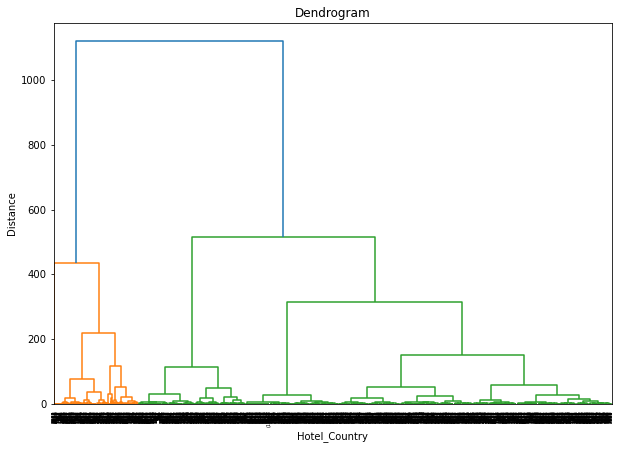

Number of clusters: 9


In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load the dataset
data = pd.read_csv("correlation data.csv")

# Subset the dataset to only include the percentage of reviews per topic
subset_data = data.iloc[:, 4:]

# Calculate the linkage matrix using Ward's method
Z = linkage(subset_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=100)
plt.xlabel('Hotel_Country')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

# Identify the number of clusters
max_d = 100  # Threshold distance
clusters = fcluster(Z, max_d, criterion='distance')

# Add the clusters to the original dataset
data['Cluster'] = clusters

# Print the number of clusters
print('Number of clusters:', len(set(clusters)))

In [42]:
data.to_excel("ClusterAnalysis.xlsx",sheet_name='ClusterAnalysis')  

In [47]:
data.head()

,Unnamed: 0,hotel_country,topic_label,clean_reviews,percentage,Cluster
0,0,9Brick_Hotel,0,1,5.0,8
1,1,9Brick_Hotel,1,1,5.0,8
2,2,9Brick_Hotel,2,4,20.0,5
3,3,9Brick_Hotel,3,0,0.0,7
4,4,9Brick_Hotel,4,1,5.0,8
